# Prubea

In [47]:
import matplotlib.pyplot as plt
import os
import math
import numpy as np

In [2]:
def regresa_suma(matriz):
    res = []
    estados = []
    for i in range(1, len(matriz)):
        fila = matriz[i]
        estados.append(fila[2])
        suma = 0
        for j in range(3, len(fila)):
            cantidad = fila[j]
            suma += int(cantidad)
        res.append(suma)
    return res, estados

def grafica_linea(x,y):
    fig, ax = plt.subplots(figsize=(16,8))
    
    ax.plot(x,y)
    plt.xticks(x, rotation=90)
    plt.margins(0.1)
    plt.subplots_adjust(bottom=0.25)
    plt.grid(True)
    plt.title("Gráfica de línea")
    ax.set_xlabel("Eje x")
    ax.set_ylabel("Eje y")
    plt.show()

In [6]:
    #path = os.path.dirname(__file__)
    datos = []
    with open('datos.csv', 'r') as f:
        linea = True
        while linea:
            linea = f.readline()
            if len(linea) > 0:  # Limpieza de datos.. 
                linea = linea[:-1]  # Se elimina el ultimo enter
                fila = linea.split(',')
                datos.append(fila)
    resultado, estados= regresa_suma(datos)
    print(resultado, estados)

[2178, 8401, 1394, 2475, 4784, 4068, 47851, 5936, 618, 2157, 9179, 6374, 3871, 7768, 38554] ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA', 'DISTRITO FEDERAL', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO', 'JALISCO', 'MEXICO']


In [7]:
    #path = os.path.dirname(__file__)
    datos = []
    with open('Casos_Diarios_Estado_Nacional_Confirmados_20230531.csv', 'r') as f:
        linea = True
        while linea:
            linea = f.readline()
            if len(linea) > 0:  # Limpieza de datos.. 
                linea = linea[:-1]  # Se elimina el ultimo enter
                fila = linea.split(',')
                datos.append(fila)
    resultado, estados= regresa_suma(datos)
    print(resultado, estados)

[91382, 179677, 130852, 44457, 59188, 174600, 1899353, 189809, 72261, 82111, 373401, 120686, 130345, 298895, 759644, 118286, 101905, 77620, 430046, 160509, 226003, 189521, 123312, 256236, 185141, 205555, 221791, 186930, 61869, 240541, 145085, 84051, 7621062] ['"AGUASCALIENTES"', '"BAJA CALIFORNIA"', '"BAJA CALIFORNIA SUR"', '"CAMPECHE"', '"CHIAPAS"', '"CHIHUAHUA"', '"DISTRITO FEDERAL"', '"COAHUILA"', '"COLIMA"', '"DURANGO"', '"GUANAJUATO"', '"GUERRERO"', '"HIDALGO"', '"JALISCO"', '"MEXICO"', '"MICHOACAN"', '"MORELOS"', '"NAYARIT"', '"NUEVO LEON"', '"OAXACA"', '"PUEBLA"', '"QUERETARO"', '"QUINTANA ROO"', '"SAN LUIS POTOSI"', '"SINALOA"', '"SONORA"', '"TABASCO"', '"TAMAULIPAS"', '"TLAXCALA"', '"VERACRUZ"', '"YUCATAN"', '"ZACATECAS"', '"Nacional"']


In [49]:
max(np.array(nacional).astype('int'))


81302

In [139]:
def maximoCasosidx(datos, idestado=33):
    
    dias = datos[0][3:]
    casos_por_estado = datos[idestado][3:]
    maximo = 0

    for i in range(0,len(casos_por_estado)):
        
        if int(casos_por_estado[i]) > maximo:
            maximo = int(casos_por_estado[i])
        else:
            maximo = maximo
    # busca id del máximo
    idx = []
    for i in range(len(casos_por_estado)):
        if int(casos_por_estado[i]) == maximo:
            idx.append(dias[i])  
        else:
            continue
        
            
    
    return  [datos[idestado][2] , idx[0], maximo]

In [144]:
datos[1][2]

'"AGUASCALIENTES"'

In [164]:

def arregloCasosEstados(datos):
    maxEstado = []
    for i in range(1,34):
        maxEstado.append(maximoCasosidx(datos, idestado=i))
    return maxEstado

In [169]:
def muestra_tabla(datos):
    column_labels = ['Estado', 'Fecha', 'Máximo']
    fig, ax = plt.subplots(figsize=(16,8))
    ax.table(cellText=datos, colLabels=column_labels,loc="center")
    ax.axis('tight')
    ax.axis('off')
    plt.show()

<AxesSubplot:>

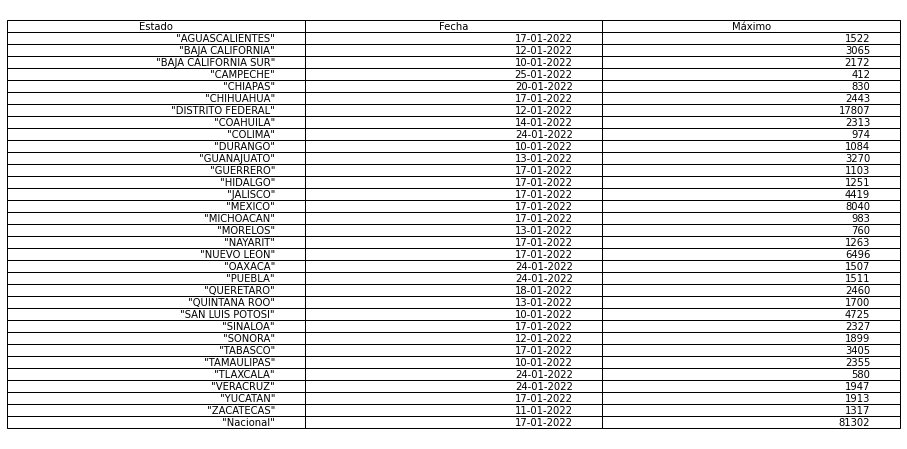

In [171]:
maxEstado = arregloCasosEstados(datos)
muestra_tabla(maxEstado)

In [172]:
def grafica_linea(x,y):
    fig, ax = plt.subplots(figsize=(16,8))
    
    ax.plot(x,y)
    plt.xticks(x, rotation=90)
    plt.margins(0.1)
    plt.subplots_adjust(bottom=0.25)
    plt.grid(True)
    plt.title("Máximo número de contagios por estado")
    ax.set_xlabel("Estado")
    ax.set_ylabel("Contagios")
    plt.show()

In [173]:
list_estados = []
list_fechas = []
list_maximo = []
for estado, fecha, maximo in maxEstado:
    list_estados.append(estado)
    list_fechas.append(fecha)
    list_maximo.append(maximo)

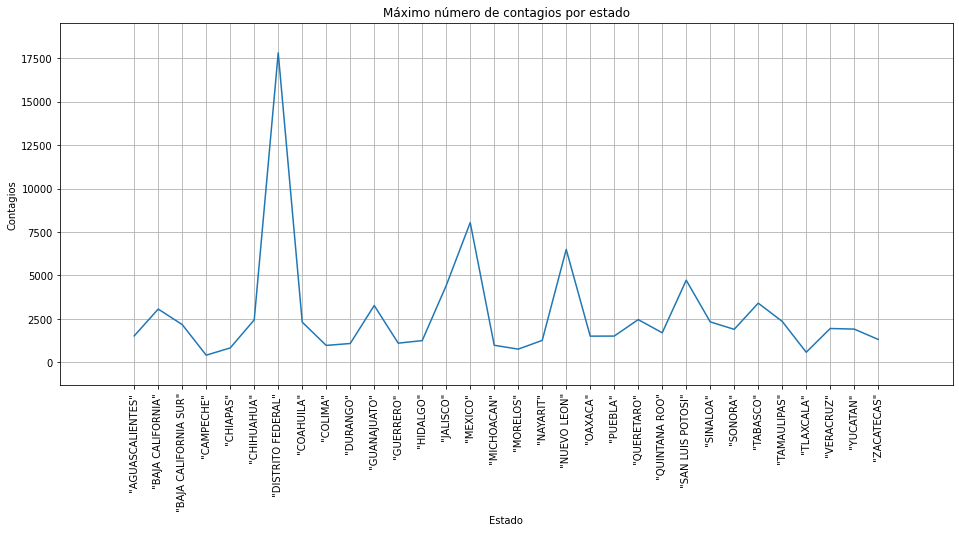

In [174]:
grafica_linea(list_estados[0:-1], list_maximo[0:-1])

# opción 2

In [175]:
def regresa_suma(matriz):
    res = []
    estados = []
    for i in range(1, len(matriz)):
        fila = matriz[i]
        estados.append(fila[2])
        suma = 0
        for j in range(3, len(fila)):
            cantidad = fila[j]
            suma += int(cantidad)
        res.append(suma)
    return res, estados

In [204]:
def totalCasosPoblacion(datos, idestado=33):
    estado = datos[idestado][2]
    poblacion = int(datos[idestado][1])
    casos_por_estado = datos[idestado][3:]
    total_contagios = 0
    
    for casos in casos_por_estado:    
        total_contagios = total_contagios + int(casos)
 
    porcen_casos_por_pob   = (total_contagios/poblacion)*100
    return  [ estado, poblacion, total_contagios, round(porcen_casos_por_pob,2)]

In [205]:
def arregloCasosEstados2(datos):
    listEstado = []
    for i in range(1,34):
        listEstado.append(totalCasosPoblacion(datos, idestado=i))
    return listEstado

In [206]:
casos_estado = arregloCasosEstados2(datos)

In [207]:
def muestra_tabla2(datos):
    column_labels = ['Estado', 'Población', '# Contagios', 'Porcentaje']
    fig, ax = plt.subplots(figsize=(16,8))
    ax.table(cellText=datos, colLabels=column_labels,loc="center")
    ax.axis('tight')
    ax.axis('off')
    plt.show()

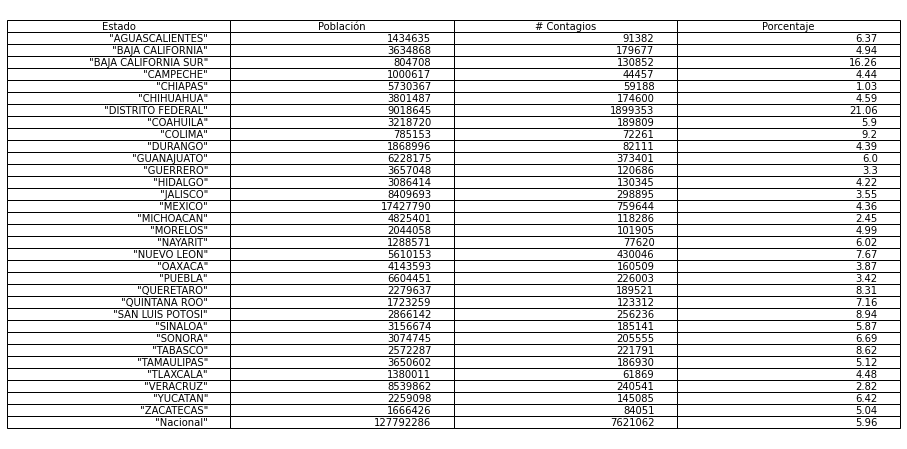

In [208]:
muestra_tabla2(casos_estado)

In [209]:
def listaEstados2(datos):
    list_estados = []
    list_poblacion = []
    list_contagios = []
    list_porcentaje = []
    for estado,poblacion,contagios,porcentaje in datos:
                list_estados.append(estado)
                list_poblacion.append(poblacion)
                list_contagios.append(contagios)
                list_porcentaje.append(porcentaje)
                
    return list_estados, list_poblacion, list_contagios, list_porcentaje

In [210]:
estados, poblacion, contagios, porcentaje = listaEstados2(casos_estado)

In [247]:
def grafica_barra(x,y):
    fig, ax = plt.subplots(figsize=(16,8))
    
    ax.bar(x,y, color='blue')
    plt.xticks(x, rotation=90)
    plt.margins(0.1)
    plt.subplots_adjust(bottom=0.25)
    plt.grid(True)
    plt.title("Percentaje de contagios respecto a la población")
    ax.set_xlabel("")
    ax.set_ylabel("Porcentaje")
    
    def add_value_labels(ax, spacing=5):
        """Add labels to the end of each bar in a bar chart.

        Arguments:
            ax (matplotlib.axes.Axes): The matplotlib object containing the axes
                of the plot to annotate.
            spacing (int): The distance between the labels and the bars.
        """

        # labels
        for rect in ax.patches:
            # Get X and Y placement of label from rect.
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            # Number of points between bar and label. Change to your liking.
            space = spacing
            # Vertical alignment for positive values
            va = 'bottom'

            # If value of bar is negative: Place label below bar
            if y_value < 0:
                # Invert space to place label below
                space *= -1
                # Vertically align label at top
                va = 'top'

            # Use Y value as label and format number with one decimal place
            label = "{:.1f}%".format(y_value)

            # Create annotation
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va)                      # Vertically align label differently for
                                        # positive and negative values.


    # Call the function above. All the magic happens there.
    add_value_labels(ax)
    plt.show()

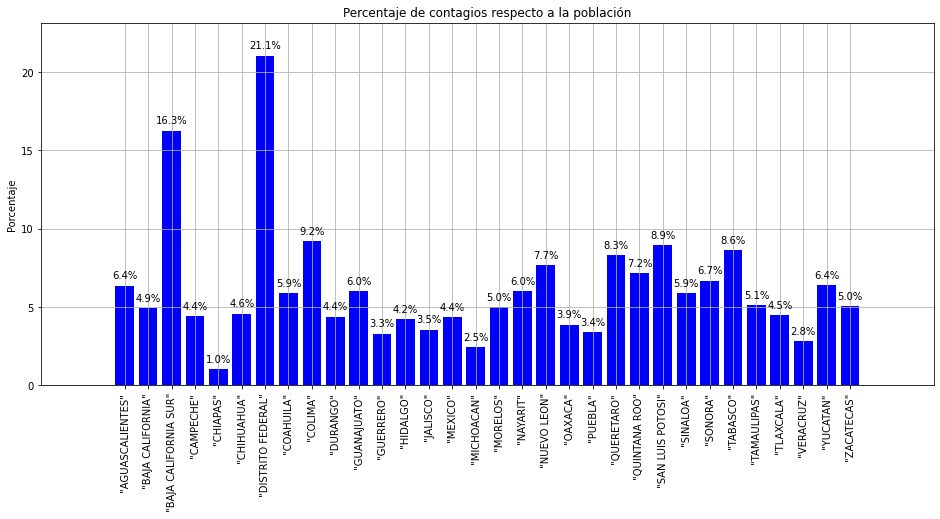

In [248]:
grafica_barra(estados[0:-1], porcentaje[0:-1])

# Opción 3

In [388]:
def totalCasosMes(datos, idestado=33):
    estado = datos[idestado][2]
    fecha = datos[idestado][3]
    poblacion = int(datos[idestado][1])
    casos_por_estado = datos[idestado][3:]
    total_contagios = 0
        
    meses = ['01','02','03','04','05','06','07','08','09','10','11','12']
    anios = ['2020', '2021', '2022', '2023']
    mesanio = []
    total = []
   
    for anio in anios:
        for mes in meses:
            mesAnio = mes+'-'+anio
            mesanio.append(mesAnio)
            total_contagios = 0
            i = 0
            for i in range(len(casos_por_estado)): 
                if datos[0][3+i][3:10] == mesAnio:
                    total_contagios = total_contagios + int(casos_por_estado[i])
                else:
                    continue
                i += 1
            total.append(total_contagios)
    return  mesanio, total

In [385]:
def grafica_linea2(x,y, label):
    fig, ax = plt.subplots(figsize=(16,8))
    
    ax.plot(x,y)
    ax.plot(x,y, 'o')
    plt.xticks(x, rotation=90)
    plt.margins(0.1)
    plt.subplots_adjust(bottom=0.25)
    plt.grid(True)
    plt.title("Serie de tiempo mensual para "+ label)
    ax.set_xlabel("Mes")
    ax.set_ylabel("Contagios")
    
    for x, y in zip(x, y):
        ax.text(x, y, f"{y}", fontsize=8, rotation=40)
        
    plt.show()

In [393]:
def casosPorMesEstado(estado):
    
    if estado == 'AGUASCALIENTES':
        fechas, casos = totalCasosMes(datos, idestado=1)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'BAJA CALIFORNIA':
        fechas, casos = totalCasosMes(datos, idestado=2)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'BAJA CALIFORNIA SUR':
        fechas, casos = totalCasosMes(datos, idestado=3)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'CAMPECHE':
        fechas, casos = totalCasosMes(datos, idestado=4)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'CHIAPAS':
        fechas, casos = totalCasosMes(datos, idestado=5)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'CHIHUAHUA':
        fechas, casos = totalCasosMes(datos, idestado=6)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'DISTRITO FEDERAL':
        fechas, casos = totalCasosMes(datos, idestado=7)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'COAHUILA':
        fechas, casos = totalCasosMes(datos, idestado=8)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'COLIMA':
        fechas, casos = totalCasosMes(datos, idestado=9)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'DURANGO':
        fechas, casos = totalCasosMes(datos, idestado=10)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'GUANAJUATO':
        fechas, casos = totalCasosMes(datos, idestado=11)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'GUERRERO':
        fechas, casos = totalCasosMes(datos, idestado=12)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'HIDALGO':
        fechas, casos = totalCasosMes(datos, idestado=13)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'JALISCO':
        fechas, casos = totalCasosMes(datos, idestado=14)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'MEXICO':
        fechas, casos = totalCasosMes(datos, idestado=15)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'MICHOACAN':
        fechas, casos = totalCasosMes(datos, idestado=16)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'MORELOS':
        fechas, casos = totalCasosMes(datos, idestado=17)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'NAYARIT':
        fechas, casos = totalCasosMes(datos, idestado=18)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'NUEVO LEON':
        fechas, casos = totalCasosMes(datos, idestado=19)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'OAXACA':
        fechas, casos = totalCasosMes(datos, idestado=20)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'PUEBLA':
        fechas, casos = totalCasosMes(datos, idestado=21)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'QUERETARO':
        fechas, casos = totalCasosMes(datos, idestado=22)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'QUINTANA ROO':
        fechas, casos = totalCasosMes(datos, idestado=23)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'SAN LUIS POTOSI':
        fechas, casos = totalCasosMes(datos, idestado=24)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'SINALOA':
        fechas, casos = totalCasosMes(datos, idestado=25)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'SONORA':
        fechas, casos = totalCasosMes(datos, idestado=26)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'TABASCO':
        fechas, casos = totalCasosMes(datos, idestado=27)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'TAMAULIPAS':
        fechas, casos = totalCasosMes(datos, idestado=28)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'TLAXCALA':
        fechas, casos = totalCasosMes(datos, idestado=29)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'VERACRUZ':
        fechas, casos = totalCasosMes(datos, idestado=30)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'YUCATAN':
        fechas, casos = totalCasosMes(datos, idestado=31)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'ZACATECAS':
        fechas, casos = totalCasosMes(datos, idestado=32)
        grafica_linea2(fechas[0:-6], casos[0:-6], estado)
        # nacional
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    elif estado == 'NACIONAL':
        fechas1, casos1 = totalCasosMes(datos, idestado=33)
        grafica_linea2(fechas1[0:-6], casos1[0:-6], 'NACIONAL')
    else:
        print('Lugar inválido')
        

In [394]:
estado = 'MEX'
casosPorMesEstado(estado)   

Lugar inválido


In [10]:
opcion = '1'

if type((opcion)) == int:
    print('entero')
else:
    print('no entero')

no entero
